## HMM-GLM Model In Our Dataset

In [1]:
import pandas as pd
import numpy.random as npr
import matplotlib.pyplot as plt
import ssm
from ssm.util import find_permutation
import Preprocessing as pp
import numpy as np

npr.seed(0)

In [2]:
X, y = pp.extract_features(
    '../../behavior data integrated/Bhv 7 - Ctrl/M2/Contingency Flip/FED000_071823_00.CSV'
    )
X[:5]

array([[1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

### Define and Train the HMM for 3 State

In [3]:
# Set the parameters of the GLM-HMM
num_states = 3        # number of discrete states
obs_dim = 1           # number of observed dimensions
num_categories = 2    # number of categories for output
input_dim = 4         # input dimensions
max_iter = 1000       # max number of iteration in EM part

# Make a GLM-HMM
three_glmhmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
                   observation_kwargs=dict(C=num_categories), transitions="standard")

In [4]:
log3 = three_glmhmm.fit(y, inputs=X, method='em', num_iters=max_iter, tolerance=10**-4)

  0%|          | 0/1000 [00:00<?, ?it/s]

### Check Model Correct Rate

In [5]:
para = three_glmhmm.observations.params
tran = three_glmhmm.transitions.params

In [6]:
valid_hmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
                   observation_kwargs=dict(C=num_categories), transitions="standard")
valid_hmm.observations.params = para
valid_hmm.transitions.params = tran

Text(0.5, 1.0, 'Generative transition matrix')

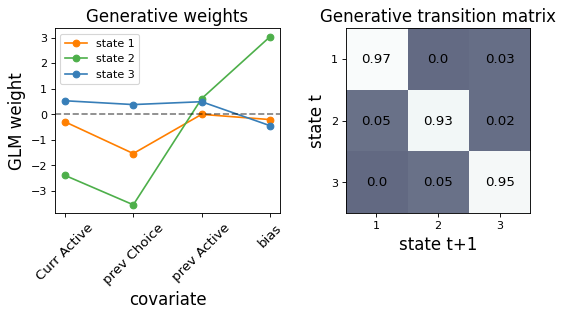

In [8]:
# Plot parameters:
fig = plt.figure(figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
cols = ['#ff7f00', '#4daf4a', '#377eb8']
for k in range(num_states):
    plt.plot(range(input_dim), para[k][0], marker='o',
             color=cols[k], linestyle='-',
             lw=1.5, label="state " + str(k+1))
plt.yticks(fontsize=10)
plt.ylabel("GLM weight", fontsize=15)
plt.xlabel("covariate", fontsize=15)
plt.xticks([0, 1, 2, 3], ['Curr Active', 'prev Choice', 'prev Active', 'bias'], fontsize=12, rotation=45)
plt.axhline(y=0, color="k", alpha=0.5, ls="--")
plt.legend()
plt.title("Generative weights", fontsize = 15)

plt.subplot(1, 2, 2)
gen_trans_mat = np.exp(tran)[0]
plt.imshow(gen_trans_mat, vmin=-0.8, vmax=1, cmap='bone')
for i in range(gen_trans_mat.shape[0]):
    for j in range(gen_trans_mat.shape[1]):
        text = plt.text(j, i, str(np.around(gen_trans_mat[i, j], decimals=2)), ha="center", va="center",
                        color="k", fontsize=12)
plt.xlim(-0.5, num_states - 0.5)
plt.xticks(range(0, num_states), ('1', '2', '3'), fontsize=10)
plt.yticks(range(0, num_states), ('1', '2', '3'), fontsize=10)
plt.ylim(num_states - 0.5, -0.5)
plt.ylabel("state t", fontsize = 15)
plt.xlabel("state t+1", fontsize = 15)
plt.title("Generative transition matrix", fontsize = 15)

In [ ]:
true_state, true_choices = [], []
three_glmhmm.sample(size, input=X[0])

In [5]:
log3 = [val/1000 for val in log3]

Text(0.5, 1.0, 'Fitting with 3 states Using EM Algorithm')

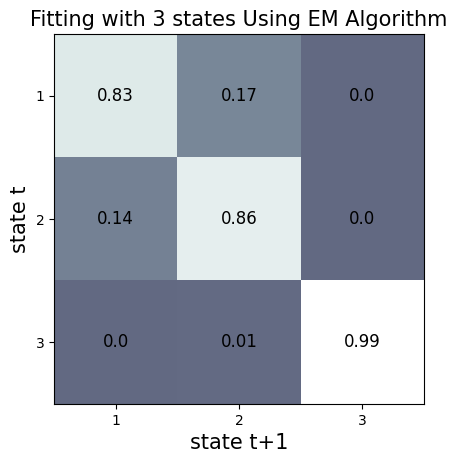

In [27]:
recovered_trans_mat = np.exp(three_glmhmm.transitions.log_Ps)
plt.imshow(recovered_trans_mat, vmin=-0.8, vmax=1, cmap='bone')
for i in range(recovered_trans_mat.shape[0]):
    for j in range(recovered_trans_mat.shape[1]):
        text = plt.text(j, i, str(np.around(recovered_trans_mat[i, j], decimals=2)), ha="center", va="center",
                        color="k", fontsize=12)
plt.xlim(-0.5, num_states - 0.5)
plt.xticks(range(0, num_states), ('1', '2', '3'), fontsize=10)
plt.yticks(range(0, num_states), ('1', '2', '3'), fontsize=10)
plt.ylim(num_states - 0.5, -0.5)
plt.ylabel("state t", fontsize = 15)
plt.xlabel("state t+1", fontsize = 15)
plt.title("Fitting with 3 states Using EM Algorithm", fontsize = 15)

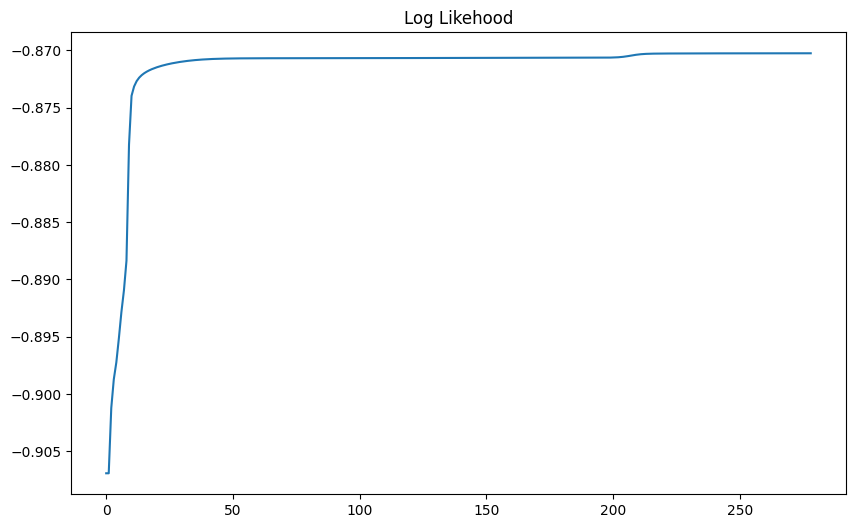

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(log3)
plt.title("Log Likehood")
plt.show()

In [43]:
three_glmhmm.params

((array([-1.84206808e+01, -1.84206808e+01, -2.00000000e-08]),),
 (array([[-1.46554112e-01, -1.99274285e+00, -7.82973165e+01],
         [-1.75970393e+00, -1.88857842e-01, -7.79085366e+01],
         [-5.05888057e+00, -1.21563631e+01, -6.37821940e-03]]),),
 array([[[ 8.00911512, 14.14768745,  2.18312932],
         [14.41988034, 14.87614251,  3.17648342]],
 
        [[14.70193994, 17.0881078 ,  1.8766307 ],
         [12.84828243, 17.15353076,  2.35075168]],
 
        [[15.86098946, 13.90728466, -0.11286752],
         [ 7.17693154, 15.97195092,  9.16260572]]]))

In [17]:
# Set the parameters of the GLM-HMM
num_states = 2        # number of discrete states

# Make a GLM-HMM
two_glmhmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
                   observation_kwargs=dict(C=num_categories), transitions="standard")

In [20]:
two_glmhmm.fit(y, inputs=X, method='em', num_iters=max_iter, tolerance=10**-4)

Converged to LP: -834.6:   6%|▌         | 62/1000 [00:02<00:43, 21.64it/s]


[-858.0031722149947,
 -858.0031721950158,
 -856.3600367884819,
 -852.6703234479513,
 -846.8464272082377,
 -841.9257738379044,
 -839.4346356995563,
 -838.3329034487454,
 -837.7472166216205,
 -837.3595279542576,
 -837.0675888151204,
 -836.8316155062812,
 -836.6330260851885,
 -836.4628846578257,
 -836.3167544544458,
 -836.1914627284273,
 -836.082568221237,
 -835.981326076399,
 -835.8695005164218,
 -835.7137282114252,
 -835.4788622234911,
 -835.1873732626599,
 -834.9375100285637,
 -834.7885142421237,
 -834.7173719180942,
 -834.6853493088244,
 -834.6701151066318,
 -834.6620417807505,
 -834.6572575207977,
 -834.6541511450259,
 -834.651989153658,
 -834.6504003818379,
 -834.6491782938347,
 -834.6482000842647,
 -834.6473894023735,
 -834.6466973607513,
 -834.6460922544634,
 -834.6455530185892,
 -834.645065545734,
 -834.6446201941003,
 -834.644210045055,
 -834.6438302383724,
 -834.6434770907979,
 -834.6431477697217,
 -834.6428399961562,
 -834.6425518959827,
 -834.6422818820834,
 -834.642028579274

Text(0.5, 1.0, 'Fitting with 2 states Using EM Algorithm')

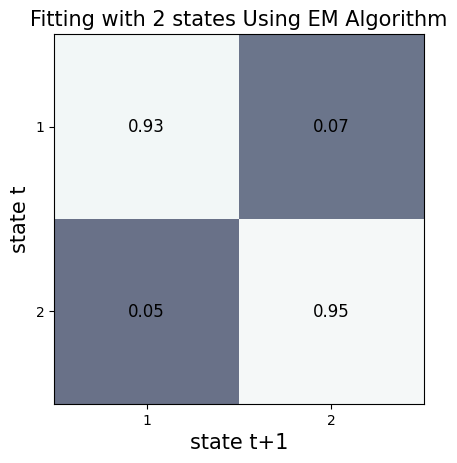

In [21]:
recovered_trans_mat = np.exp(two_glmhmm.transitions.log_Ps)
plt.imshow(recovered_trans_mat, vmin=-0.8, vmax=1, cmap='bone')
for i in range(recovered_trans_mat.shape[0]):
    for j in range(recovered_trans_mat.shape[1]):
        text = plt.text(j, i, str(np.around(recovered_trans_mat[i, j], decimals=2)), ha="center", va="center",
                        color="k", fontsize=12)
plt.xlim(-0.5, num_states - 0.5)
plt.xticks(range(0, num_states), ('1', '2'), fontsize=10)
plt.yticks(range(0, num_states), ('1', '2'), fontsize=10)
plt.ylim(num_states - 0.5, -0.5)
plt.ylabel("state t", fontsize = 15)
plt.xlabel("state t+1", fontsize = 15)
plt.title("Fitting with 2 states Using EM Algorithm", fontsize = 15)

In [29]:
num_states = 4
four_glmhmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
                   observation_kwargs=dict(C=num_categories), transitions="standard")
four_glmhmm.fit(y, inputs=X, method='em', num_iters=max_iter, tolerance=10**-4)

Converged to LP: -916.3:  20%|█▉        | 199/1000 [00:23<01:34,  8.43it/s]


[-951.1654405522152,
 -951.1654407030051,
 -946.8900633679431,
 -939.6238592996326,
 -934.7901699900955,
 -931.8201512362243,
 -928.5245450501145,
 -924.7400847085196,
 -922.6133502495248,
 -921.6551234188598,
 -921.1296576919798,
 -920.782164582554,
 -920.5278197333813,
 -920.3312081301576,
 -920.1735657557995,
 -920.0434125538335,
 -919.9332259225376,
 -919.8379468778204,
 -919.7540733574449,
 -919.6792023106065,
 -919.611494205058,
 -919.5496587178568,
 -919.4927371763981,
 -919.4400129099638,
 -919.390903858575,
 -919.3451247556127,
 -919.3023523498226,
 -919.2624025195141,
 -919.2251519658809,
 -919.1905120043484,
 -919.1584024515378,
 -919.1287331453145,
 -919.1013895400159,
 -919.0762297291811,
 -919.0530880932204,
 -919.0317823595192,
 -919.0121232113848,
 -918.993921352541,
 -918.9769974151682,
 -918.9611827981939,
 -918.9463245995382,
 -918.932282857468,
 -918.9189337654059,
 -918.9061655020237,
 -918.8938783923404,
 -918.8819833365394,
 -918.8703994571788,
 -918.859053252871

Text(0.5, 1.0, 'Fitting with 4 states Using EM Algorithm')

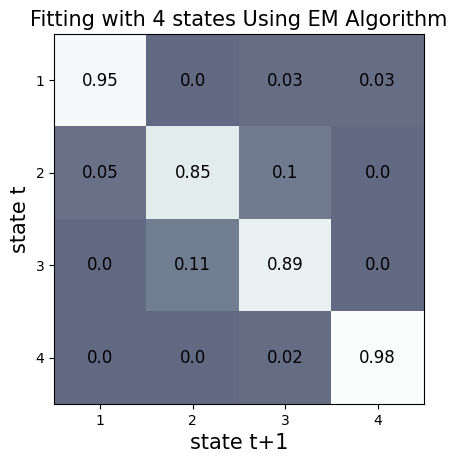

In [30]:
recovered_trans_mat = np.exp(four_glmhmm.transitions.log_Ps)
plt.imshow(recovered_trans_mat, vmin=-0.8, vmax=1, cmap='bone')
for i in range(recovered_trans_mat.shape[0]):
    for j in range(recovered_trans_mat.shape[1]):
        text = plt.text(j, i, str(np.around(recovered_trans_mat[i, j], decimals=2)), ha="center", va="center",
                        color="k", fontsize=12)
plt.xlim(-0.5, num_states - 0.5)
plt.xticks(range(0, num_states), ('1', '2', '3', '4'), fontsize=10)
plt.yticks(range(0, num_states), ('1', '2', '3', '4'), fontsize=10)
plt.ylim(num_states - 0.5, -0.5)
plt.ylabel("state t", fontsize = 15)
plt.xlabel("state t+1", fontsize = 15)
plt.title("Fitting with 4 states Using EM Algorithm", fontsize = 15)